In [ ]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

# Machine Learning
import sklearn.metrics as metrics

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize
from nltk.corpus import stopwords

from IPython.display import display

%pip install svgling
%pip install datasets

pd.options.mode.chained_assignment = None

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
from datasets import load_dataset

babe_dataset = load_dataset("mediabiasgroup/BABE")

In [ ]:
# convert to df
babe_df = pd.DataFrame(babe_dataset['train'])
babe_df_cleaned = babe_df[['text', 'topic']]

babe_df_cleaned.loc[:, 'topic'] = babe_df_cleaned.loc[:, 'topic'].apply(lambda x: " ".join(x.split("-")))

# print number of unique topics
print("Number of unique topics:", len(babe_df_cleaned['topic'].unique()))

babe_df_cleaned.head()

Number of unique topics: 22


,text,topic
0,NYPD Commissioner Dermot Shea on Monday expres...,marriage equality
1,School systems across the country are adopting...,islam
2,"And then along came President Barry Obama, who...",marriage equality
3,"The curfews, which have never before occurred ...",elections 2020
4,"Rather than help be a part of the solution, Tr...",elections 2020


In [ ]:
def make_tokens(df: pd.DataFrame) -> pd.DataFrame:
  for word in df['text']: word = word.lower()

  df['tokens'] = df['text'].apply(word_tokenize)

  return df

In [ ]:
babe_df_cleaned = make_tokens(babe_df_cleaned)
print(babe_df_cleaned.loc[0, 'tokens'])

['NYPD', 'Commissioner', 'Dermot', 'Shea', 'on', 'Monday', 'expressed', 'support', 'for', 'diverting', 'funds', 'away', 'from', 'the', 'police', 'department', 'and', 'to', 'other', 'areas', ',', 'like', 'youth', 'programs', '.']


In [ ]:
def clean_tokens(df: pd.DataFrame) -> pd.DataFrame:
  stop_words = set(stopwords.words('english'))
  df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words])
  return df

In [ ]:
babe_df_cleaned = clean_tokens(babe_df_cleaned)
print(babe_df_cleaned['tokens'].iloc[0])

['NYPD', 'Commissioner', 'Dermot', 'Shea', 'Monday', 'expressed', 'support', 'diverting', 'funds', 'away', 'police', 'department', 'areas', 'like', 'youth', 'programs']


In [ ]:
def stem_tokens(df: pd.DataFrame) -> pd.DataFrame:
  import nltk
  from nltk.stem import SnowballStemmer

  snowball_stemmer = SnowballStemmer("english")
  df['tokens_stemmed'] = df['tokens'].apply(lambda x: [snowball_stemmer.stem(word) for word in x])

  return df

In [ ]:
babe_df_cleaned = stem_tokens(babe_df_cleaned)
print(babe_df_cleaned['tokens_stemmed'].iloc[0])

['nypd', 'commission', 'dermot', 'shea', 'monday', 'express', 'support', 'divert', 'fund', 'away', 'polic', 'depart', 'area', 'like', 'youth', 'program']


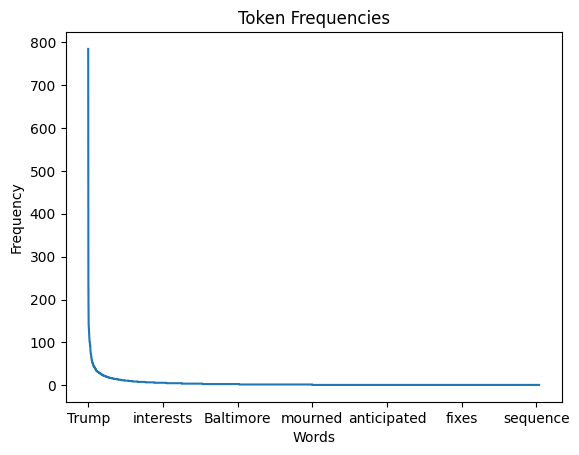

In [ ]:
counter = Counter()
for words in babe_df_cleaned['tokens']:
  counter.update(words)

token_fequencies = pd.DataFrame.from_dict(counter, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)

ax = token_fequencies.plot(legend=False, xlabel = 'Words', ylabel = 'Frequency', title = 'Frequencies Token')

In [ ]:
token_fequencies.head(10)

,frequency
Trump,784
The,540
President,268
said,267
people,243
would,243
Donald,232
coronavirus,202
police,188
Americans,158


In [ ]:
## Your code starts here ##


## end ##

In [ ]:
## Your code starts here ##

## end ##

Enter answer here: The MI score helps to connect words that can distinguish between topics.